## Preprocessing

In [1]:
# Import dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

#  Import and read `charity_data.csv`.
import pandas as pd 
application_df = pd.read_csv('https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at `APPLICATION_TYPE` value counts for binning.
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced.
# Use the variable name `application_types_to_replace`.
application_types_to_replace = application_type_counts[application_type_counts<200].index

# Replace in the `application_df` Dataframe.
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, 'Other')

# Check to make sure binning is successful.
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at `CLASSIFICATION`value counts for binning.
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# Look at `CLASSIFICATION` value counts greater than 1.
classification_counts[classification_counts>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced.
# Use the variable name `classifications_to_replace`.
classifications_to_replace = classification_counts[classification_counts<1000].index

# Replace in the `application_df` Dataframe.
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, 'Other')
    
# Check to make sure binning is successful.
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`.
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split the preprocessed data into features and target arrays.
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [11]:
# Create a StandardScaler instance.
scaler = StandardScaler()

# Fit the StandardScaler instance.
X_scaler = scaler.fit(X_train)

# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X.columns)
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# Add first hidden layer.
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Add second hidden layer.
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Add output layer.
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the model structure.
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 6,801
Trainable params: 6,801
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model.
nn.compile(loss='binary_crossentropy', 
           optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
           metrics=['accuracy'])

In [14]:
# Create checkpoints.
# Include the epoch in the file name (uses `str.format`).
checkpoint_path = "weights/{epoch:04d}.ckpt"

# Create a callback that saves the model's weights every 5 epochs.
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    save_freq='epoch', # Alternatively, set it to `int(5*y_train.size/batch_size)`. For reference, batch_size defaults to 32 during model fit. 
    period=5)

# Save the weights using the `checkpoint_path` format.
nn.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the checkpoint callback.
iters = 50
fit_model = nn.fit(X_train_scaled, 
                   y_train, 
                   epochs=iters,
                   callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 8s 6ms/step - loss: 0.5717 - accuracy: 0.7199
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5556 - accuracy: 0.7290
Epoch 3/50
804/804 [==============================] - 5s 7ms/step - loss: 0.5519 - accuracy: 0.7303
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5505 - accuracy: 0.7318
Epoch 5/50
782/804 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7311
Epoch 5: saving model to weights/0005.ckpt
804/804 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7318
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7305
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7308
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7323
Epoch 9/50
804/804 [==============================] - 3s 3ms/step - loss

Text(0.5, 0.98, 'Accuracy versus Epoch for the Training Set')

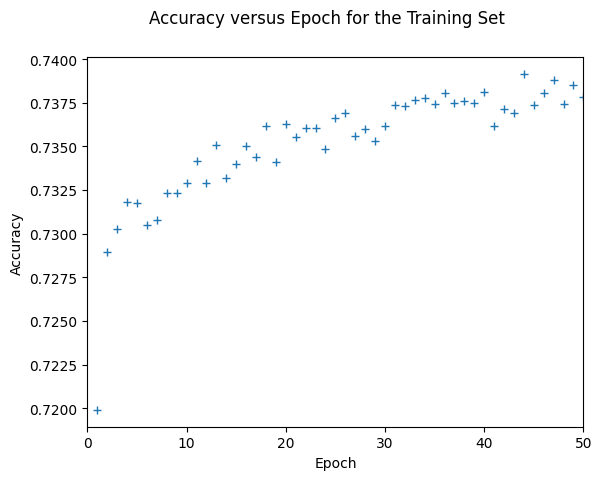

In [15]:
# Create a DataFrame containing training history.
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs.
history_df.index += 1

# Plot accuracy versus Epoch.
fig, ax = plt.subplots()
ax.plot(history_df['accuracy'], linestyle='None', marker='+')
ax.set(xlabel='Epoch', xlim=(0, iters),
       ylabel='Accuracy')
fig.suptitle('Accuracy versus Epoch for the Training Set')

In [16]:
# Evaluate the model using the test data.
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 1s - loss: 0.5579 - accuracy: 0.7286 - 515ms/epoch - 2ms/step
Loss: 0.5579439997673035, Accuracy: 0.7286297082901001


In [17]:
# Export the model in the HDF5 format.
nn.save('AlphabetSoupCharity.h5')